# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

#### 1. Summary: I will be evaluating the at-fault rates for pedestrian-involved collisions in California. In many major cities in California, pedestrians are found at fault between 60-80% of the time for fatal collisions in which they are the killed victims. I will be analyzing spatial trends and possible correlation between these rates for fatal and severe collisions and other urban geography features of major urban areas in California. 

#### 2.a. Accessing dataset 1: SWITRS collision data (.csv)

In [1]:
import pandas as pd
df = pd.read_csv('Alameda_2012_2021_Ped_FatalandSevere.csv')
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,2020-10-05,109,2020-07-23,1153,8658,1,4,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,2021-11-08,102,2021-09-25,2133,JP241113,NaN,6,5,...,0,0,-,-,37.88681,-122.297607,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,2021-09-06,9375,2021-08-30,2015,022229,NaN,1,2,...,0,0,-,-,37.69603,-122.129738,ALAMEDA,UNINCORPORATED,-122.129974,37.696049
3,6290546,2013,2014-10-31,109,2013-05-01,1518,7884,NaN,3,5,...,0,0,-,-,NaN,NaN,ALAMEDA,OAKLAND,-122.266194,37.800608
4,6855225,2015,2015-03-23,103,2015-01-04,1756,55,40,7,5,...,0,0,-,-,NaN,NaN,ALAMEDA,BERKELEY,-122.278450,37.850580


In [2]:
df.columns.values.tolist()

['CASE_ID',
 'ACCIDENT_YEAR',
 'PROC_DATE',
 'JURIS',
 'COLLISION_DATE',
 'COLLISION_TIME',
 'OFFICER_ID',
 'REPORTING_DISTRICT',
 'DAY_OF_WEEK',
 'CHP_SHIFT',
 'POPULATION',
 'CNTY_CITY_LOC',
 'SPECIAL_COND',
 'BEAT_TYPE',
 'CHP_BEAT_TYPE',
 'CITY_DIVISION_LAPD',
 'CHP_BEAT_CLASS',
 'BEAT_NUMBER',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'DISTANCE',
 'DIRECTION',
 'INTERSECTION',
 'WEATHER_1',
 'WEATHER_2',
 'STATE_HWY_IND',
 'CALTRANS_COUNTY',
 'CALTRANS_DISTRICT',
 'STATE_ROUTE',
 'ROUTE_SUFFIX',
 'POSTMILE_PREFIX',
 'POSTMILE',
 'LOCATION_TYPE',
 'RAMP_INTERSECTION',
 'SIDE_OF_HWY',
 'TOW_AWAY',
 'COLLISION_SEVERITY',
 'NUMBER_KILLED',
 'NUMBER_INJURED',
 'PARTY_COUNT',
 'PRIMARY_COLL_FACTOR',
 'PCF_CODE_OF_VIOL',
 'PCF_VIOL_CATEGORY',
 'PCF_VIOLATION',
 'PCF_VIOL_SUBSECTION',
 'HIT_AND_RUN',
 'TYPE_OF_COLLISION',
 'MVIW',
 'PED_ACTION',
 'ROAD_SURFACE',
 'ROAD_COND_1',
 'ROAD_COND_2',
 'LIGHTING',
 'CONTROL_DEVICE',
 'CHP_ROAD_TYPE',
 'PEDESTRIAN_ACCIDENT',
 'BICYCLE_ACCIDENT',
 'MOTORCYC

#### 2.b. Accessing dataset 2: FARS federal collision data (API)

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
import json
import requests
import pprint
pp = pprint.PrettyPrinter()

In [5]:
endpoint_url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/crashes/GetCaseList?states=6&fromYear=2014&toYear=2015&minNumOfVehicles=1&maxNumOfVehicles=6&format=json"
response = requests.get(endpoint_url)

In [6]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
{"Count":5967,"Message":"Warning: Showing 5000 of 5967 records. Please use the same api call and change your search paramerters or year range to get complete record counts.","Results":[[{"CountyName":"RIVERSIDE (65)","CrashDate":"\/Date(1388755920000-0500)\/","Fatals":1,"Peds":0,"Persons":2,"St_Case":60001,"State":6,"StateName":"California","TotalVehicles":2},{"CountyName":"MONTEREY (53)","CrashDate":"\/Date(1388570400000-0500)\/","Fatals":1,"Peds":0,"Persons":2,"St_Case":60002,"State":6,"StateN


In [7]:
data = json.loads(response.text)
data

{'Count': 5967,
 'Message': 'Warning: Showing 5000 of 5967 records. Please use the same api call and change your search paramerters or year range to get complete record counts.',
 'Results': [[{'CountyName': 'RIVERSIDE (65)',
    'CrashDate': '/Date(1388755920000-0500)/',
    'Fatals': 1,
    'Peds': 0,
    'Persons': 2,
    'St_Case': 60001,
    'State': 6,
    'StateName': 'California',
    'TotalVehicles': 2},
   {'CountyName': 'MONTEREY (53)',
    'CrashDate': '/Date(1388570400000-0500)/',
    'Fatals': 1,
    'Peds': 0,
    'Persons': 2,
    'St_Case': 60002,
    'State': 6,
    'StateName': 'California',
    'TotalVehicles': 1},
   {'CountyName': 'SAN FRANCISCO (75)',
    'CrashDate': '/Date(1388745000000-0500)/',
    'Fatals': 1,
    'Peds': 1,
    'Persons': 1,
    'St_Case': 60003,
    'State': 6,
    'StateName': 'California',
    'TotalVehicles': 1},
   {'CountyName': 'HUMBOLDT (23)',
    'CrashDate': '/Date(1388579400000-0500)/',
    'Fatals': 1,
    'Peds': 0,
    'Persons

In [8]:
crashes = data['Results']
crashes[0]

[{'CountyName': 'RIVERSIDE (65)',
  'CrashDate': '/Date(1388755920000-0500)/',
  'Fatals': 1,
  'Peds': 0,
  'Persons': 2,
  'St_Case': 60001,
  'State': 6,
  'StateName': 'California',
  'TotalVehicles': 2},
 {'CountyName': 'MONTEREY (53)',
  'CrashDate': '/Date(1388570400000-0500)/',
  'Fatals': 1,
  'Peds': 0,
  'Persons': 2,
  'St_Case': 60002,
  'State': 6,
  'StateName': 'California',
  'TotalVehicles': 1},
 {'CountyName': 'SAN FRANCISCO (75)',
  'CrashDate': '/Date(1388745000000-0500)/',
  'Fatals': 1,
  'Peds': 1,
  'Persons': 1,
  'St_Case': 60003,
  'State': 6,
  'StateName': 'California',
  'TotalVehicles': 1},
 {'CountyName': 'HUMBOLDT (23)',
  'CrashDate': '/Date(1388579400000-0500)/',
  'Fatals': 1,
  'Peds': 0,
  'Persons': 1,
  'St_Case': 60004,
  'State': 6,
  'StateName': 'California',
  'TotalVehicles': 1},
 {'CountyName': 'SAN DIEGO (73)',
  'CrashDate': '/Date(1389301800000-0500)/',
  'Fatals': 1,
  'Peds': 0,
  'Persons': 2,
  'St_Case': 60005,
  'State': 6,
  'St

#### 3. Clean the SWITRS dataset

In [13]:
df2 = df[['CASE_ID','ACCIDENT_YEAR','JURIS','COLLISION_DATE','COLLISION_TIME','INTERSECTION','STATE_HWY_IND','COLLISION_SEVERITY','NUMBER_KILLED','NUMBER_INJURED','PED_ACTION','PRIMARY_COLL_FACTOR','PCF_VIOL_CATEGORY','STWD_VEHTYPE_AT_FAULT','COUNTY','CITY','POINT_X','POINT_Y']]
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PED_ACTION,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,B,A,11,N,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,D,A,11,N,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,B,A,10,A,ALAMEDA,UNINCORPORATED,-122.129974,37.696049
3,6290546,2013,109,2013-05-01,1518,N,N,1,1,0,B,A,10,D,ALAMEDA,OAKLAND,-122.266194,37.800608
4,6855225,2015,103,2015-01-04,1756,Y,N,2,0,1,B,A,11,N,ALAMEDA,BERKELEY,-122.278450,37.850580


In [14]:
ped_action_to_name = {
    'A': 'No Pedestrian Involved', 'B': 'Crossing in Crosswalk at Intersection', 'C': 'Crossing in Crosswalk Not at Intersection', 'D': 'Crossing Not in Crosswalk', 'E': 'In Road, Including Shoulder',
    'F': 'Not in Road', 'G': 'Approaching/Leaving School Bus', '-': 'Not Stated'}
primary_col_factor_to_name = {
    'A': 'Vehicle Code Violation', 'B': 'Other Improper Driving', 'C': 'Other Than Driver', 'D': 'Unknown', 'E': 'Fell Asleep', '-': 'Not Stated'}
pcf_viol_category_to_name = {
    '01': 'Driving or Bicycling Under the Influence of Alcohol or Drug', '02': 'Impeding Traffic', '03': 'Unsafe Speed', '04': 'Following Too Closely', '05': 'Wrong Side of Road',
    '06': 'Improper Passing', '07': 'Unsafe Lane Change', '08': 'Improper Turning', '09': 'Automobile Right of Way',
    '10': 'Pedestrian Right of Way', '11': 'Pedestrian Violation', '12': 'Traffic Signals and Signs', '13': 'Hazardous Parking',
    '14': 'Lights', '15': 'Brakes', '16': 'Other Equipment', '17': 'Other Hazardous Violation',
    '18': 'Other Than Driver or Pedestrian', '21': 'Unsafe Starting or Backing', '22': 'Other Improper Driving', '23': 'Pedestrian or Other Under the Influence of Alcohol or Drug','24': 'Fell Asleep','00': 'Unknown','-': 'Not Stated'}
veh_type_atfault_to_name = {
    'A': 'Passenger Car/Station Wagon', 'B': 'Passenger Car with Trailer', 'C': 'Motorcycle/Scooter', 'D': 'Pickup or Panel Truck', 'E': 'Pickup or Panel Truck with Trailer', 
    'F': 'Truck or Truck Tractor', 'G': 'Truck or Truck Tractor with Trailer', 'H': 'Schoolbus', 'I': 'Other Bus', 'J': 'Emergency Vehicle',
    'K': 'Highway Construction Equipment', 'L': 'Bicycle', 'M': 'Other Vehicle', 'N': 'Pedestrian', 'O': 'Moped','-': 'Not Stated'}

In [15]:
df2.insert(11, 'ped_action_name', df2['PED_ACTION'].replace(ped_action_to_name))
df2.head(3)

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PED_ACTION,ped_action_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,B,Crossing in Crosswalk at Intersection,A,11,N,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,D,Crossing Not in Crosswalk,A,11,N,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,B,Crossing in Crosswalk at Intersection,A,10,A,ALAMEDA,UNINCORPORATED,-122.129974,37.696049


In [16]:
del df2['PED_ACTION']

In [17]:
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,Crossing in Crosswalk at Intersection,A,11,N,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,Crossing Not in Crosswalk,A,11,N,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,Crossing in Crosswalk at Intersection,A,10,A,ALAMEDA,UNINCORPORATED,-122.129974,37.696049
3,6290546,2013,109,2013-05-01,1518,N,N,1,1,0,Crossing in Crosswalk at Intersection,A,10,D,ALAMEDA,OAKLAND,-122.266194,37.800608
4,6855225,2015,103,2015-01-04,1756,Y,N,2,0,1,Crossing in Crosswalk at Intersection,A,11,N,ALAMEDA,BERKELEY,-122.278450,37.850580


In [18]:
df2.insert(11, 'prim_col_factor_name', df2['PRIMARY_COLL_FACTOR'].replace(primary_col_factor_to_name))
df2.insert(12, 'pcf_viol_category_name', df2['PCF_VIOL_CATEGORY'].replace(pcf_viol_category_to_name))
df2.insert(12, 'veh_type_atfault_name', df2['STWD_VEHTYPE_AT_FAULT'].replace(veh_type_atfault_to_name))
df2.head(3)

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,...,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,...,Vehicle Code Violation,Pedestrian,Pedestrian Violation,A,11,N,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,...,Vehicle Code Violation,Pedestrian,Pedestrian Violation,A,11,N,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,...,Vehicle Code Violation,Passenger Car/Station Wagon,Pedestrian Right of Way,A,10,A,ALAMEDA,UNINCORPORATED,-122.129974,37.696049


In [19]:
del df2['PRIMARY_COLL_FACTOR']
del df2['PCF_VIOL_CATEGORY']
del df2['STWD_VEHTYPE_AT_FAULT']
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Passenger Car/Station Wagon,Pedestrian Right of Way,ALAMEDA,UNINCORPORATED,-122.129974,37.696049
3,6290546,2013,109,2013-05-01,1518,N,N,1,1,0,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pickup or Panel Truck,Pedestrian Right of Way,ALAMEDA,OAKLAND,-122.266194,37.800608
4,6855225,2015,103,2015-01-04,1756,Y,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.278450,37.850580


#### 4.a. Group-by: Collision Severity by Vehicle type at fault

In [20]:
df2.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count()

COLLISION_SEVERITY
1    273
2    869
Name: CASE_ID, dtype: int64

In [21]:
df2.groupby(['COLLISION_SEVERITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack()

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
COLLISION_SEVERITY,,,,,,,,,,,,,
1,NaN,1.0,1.0,36.0,3.0,NaN,86.0,128.0,14.0,NaN,1.0,3.0,NaN
2,3.0,2.0,4.0,130.0,3.0,1.0,399.0,284.0,37.0,1.0,NaN,4.0,1.0


In [22]:
pd.crosstab(df2['COLLISION_SEVERITY'], df2['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
COLLISION_SEVERITY,,,,,,,,,,,,,
1,0.000000,0.003663,0.003663,0.131868,0.010989,0.000000,0.315018,0.468864,0.051282,0.000000,0.003663,0.010989,0.000000
2,0.003452,0.002301,0.004603,0.149597,0.003452,0.001151,0.459148,0.326812,0.042578,0.001151,0.000000,0.004603,0.001151
All,0.002627,0.002627,0.004378,0.145359,0.005254,0.000876,0.424694,0.360771,0.044658,0.000876,0.000876,0.006130,0.000876


#### 4.b. Crosstab: Vehicle type at fault by City - filtered by collision severity

In [23]:
df_fatal = df2.loc[df2['COLLISION_SEVERITY'] == 1]
df_fatal.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
3,6290546,2013,109,2013-05-01,1518,N,N,1,1,0,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pickup or Panel Truck,Pedestrian Right of Way,ALAMEDA,OAKLAND,-122.266194,37.800608
8,6718714,2017,106,2017-09-29,1835,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,HAYWARD,-122.070769,37.627096
11,8911548,2019,109,2019-12-12,1834,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,OAKLAND,-122.288055,37.804207
18,6718248,2014,109,2014-08-30,1338,N,N,1,1,0,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Emergency Vehicle,Pedestrian Right of Way,ALAMEDA,OAKLAND,-122.256447,37.796510
19,8404474,2017,109,2017-01-12,2220,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Passenger Car/Station Wagon,Improper Turning,ALAMEDA,OAKLAND,-122.243016,37.787830


In [24]:
df_severe = df2.loc[df2['COLLISION_SEVERITY'] == 2]
df_severe.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
0,9136283,2020,109,2020-07-23,1153,N,N,2,0,2,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,OAKLAND,-122.261604,37.812733
1,9355765,2021,102,2021-09-25,2133,Y,Y,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,ALBANY,-122.297836,37.886410
2,91563207,2021,9375,2021-08-30,2015,N,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Passenger Car/Station Wagon,Pedestrian Right of Way,ALAMEDA,UNINCORPORATED,-122.129974,37.696049
4,6855225,2015,103,2015-01-04,1756,Y,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.278450,37.850580
5,6855226,2015,103,2015-01-04,1516,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.283123,37.894274


In [25]:
pd.crosstab(df_fatal['CITY'], df_fatal['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Schoolbus,Truck or Truck Tractor
CITY,,,,,,,,,
ALAMEDA,0.000000,0.000000,0.000000,0.166667,0.500000,0.333333,0.000000,0.000000,0.000000
ALBANY,0.000000,0.000000,0.000000,0.200000,0.200000,0.400000,0.200000,0.000000,0.000000
BERKELEY,0.000000,0.000000,0.125000,0.000000,0.375000,0.437500,0.062500,0.000000,0.000000
DUBLIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000
EMERYVILLE,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000
FREMONT,0.000000,0.000000,0.205882,0.000000,0.294118,0.500000,0.000000,0.000000,0.000000
HAYWARD,0.000000,0.027027,0.135135,0.027027,0.378378,0.378378,0.027027,0.027027,0.000000
LIVERMORE,0.000000,0.000000,0.111111,0.000000,0.222222,0.555556,0.111111,0.000000,0.000000
NEWARK,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [26]:
pd.crosstab(df_severe['CITY'], df_severe['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
CITY,,,,,,,,,,,,
ALAMEDA,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.625000,0.333333,0.000000,0.000000,0.000000,0.000000
ALBANY,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.454545,0.272727,0.090909,0.000000,0.000000,0.000000
BERKELEY,0.009091,0.000000,0.000000,0.063636,0.018182,0.000000,0.672727,0.227273,0.009091,0.000000,0.000000,0.000000
DUBLIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000
EMERYVILLE,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.142857,0.571429,0.000000,0.000000,0.000000,0.000000
FREMONT,0.000000,0.017241,0.000000,0.137931,0.000000,0.000000,0.396552,0.413793,0.034483,0.000000,0.000000,0.000000
HAYWARD,0.000000,0.000000,0.000000,0.128205,0.000000,0.000000,0.461538,0.346154,0.038462,0.012821,0.012821,0.000000
LIVERMORE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.523810,0.190476,0.000000,0.000000,0.000000
NEWARK,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000


#### 4.b. Crosstab: Vehicle type at fault by pedestrian action - filtered by collision severity

In [27]:
pd.crosstab(df_fatal['ped_action_name'], df_fatal['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Schoolbus,Truck or Truck Tractor
ped_action_name,,,,,,,,,
Crossing Not in Crosswalk,0.000000,0.000000,0.166667,0.000000,0.148148,0.685185,0.000000,0.000000,0.000000
Crossing in Crosswalk Not at Intersection,0.000000,0.000000,0.250000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000
Crossing in Crosswalk at Intersection,0.012195,0.012195,0.146341,0.024390,0.439024,0.243902,0.097561,0.012195,0.012195
"In Road, Including Shoulder",0.000000,0.000000,0.115702,0.000000,0.247934,0.578512,0.049587,0.000000,0.008264
Not Stated,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Not in Road,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.000000,0.000000,0.090909
All,0.003663,0.003663,0.131868,0.010989,0.315018,0.468864,0.051282,0.003663,0.010989


In [28]:
pd.crosstab(df_severe['ped_action_name'], df_severe['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
ped_action_name,,,,,,,,,,,,
Crossing Not in Crosswalk,0.000000,0.000000,0.004425,0.106195,0.000000,0.004425,0.163717,0.707965,0.013274,0.000000,0.000000,0.000000
Crossing in Crosswalk Not at Intersection,0.000000,0.000000,0.000000,0.185185,0.000000,0.000000,0.592593,0.185185,0.037037,0.000000,0.000000,0.000000
Crossing in Crosswalk at Intersection,0.002604,0.000000,0.002604,0.138021,0.005208,0.000000,0.651042,0.135417,0.062500,0.000000,0.002604,0.000000
"In Road, Including Shoulder",0.000000,0.011765,0.005882,0.229412,0.005882,0.000000,0.347059,0.347059,0.035294,0.005882,0.005882,0.005882
Not Stated,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.200000,0.700000,0.000000,0.000000,0.000000,0.000000
Not in Road,0.038462,0.000000,0.019231,0.153846,0.000000,0.000000,0.673077,0.019231,0.057692,0.000000,0.038462,0.000000
All,0.003452,0.002301,0.004603,0.149597,0.003452,0.001151,0.459148,0.326812,0.042578,0.001151,0.004603,0.001151


#### 5.a. Visualize the party at-fault rates by City

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<AxesSubplot:title={'center':'Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='number of collisions'>

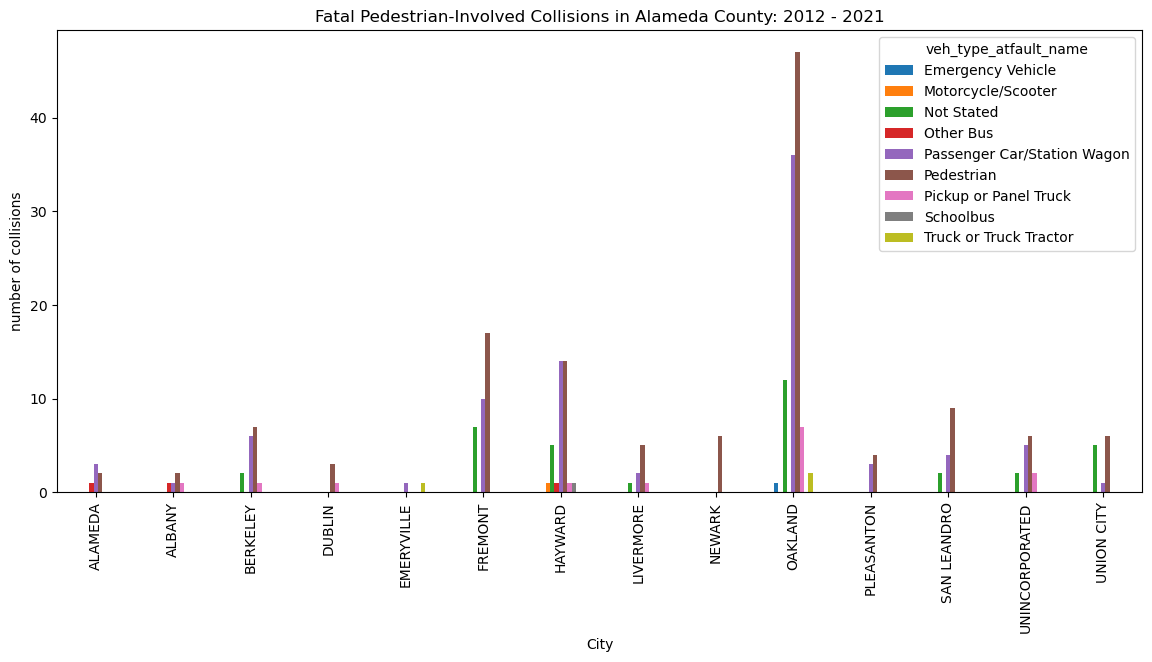

In [30]:
df_fatal.groupby(['CITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='number of collisions', xlabel='City')

<AxesSubplot:title={'center':'Severe Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='number of collisions'>

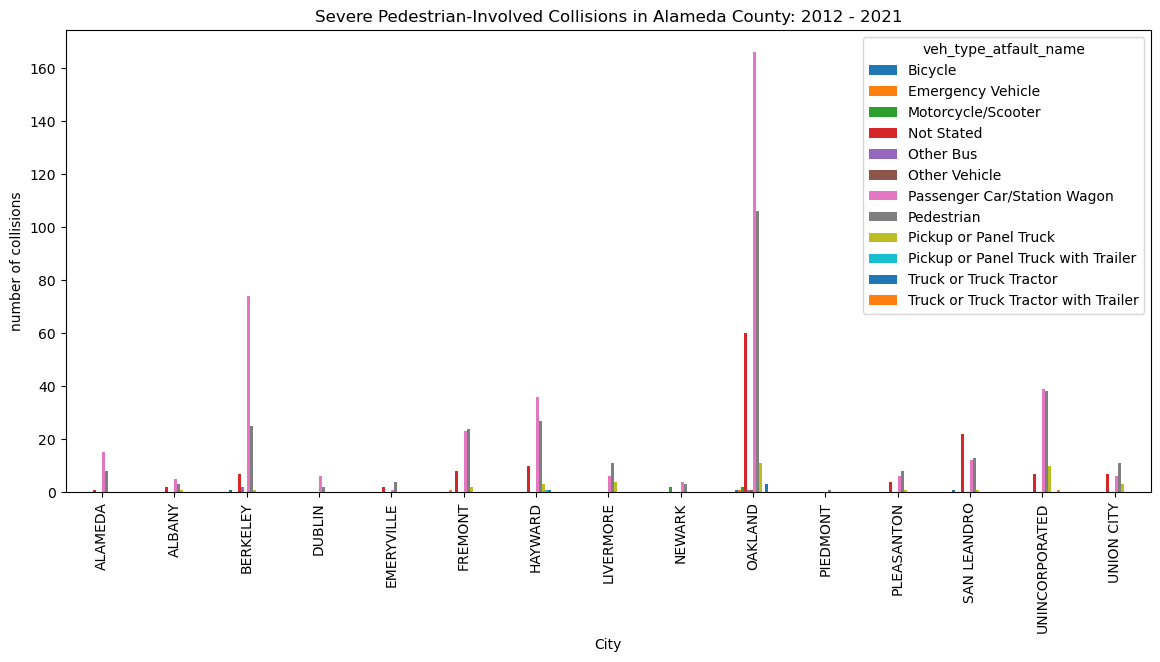

In [31]:
df_severe.groupby(['CITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Severe Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='number of collisions', xlabel='City')

<AxesSubplot:title={'center':'Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='percentage of collisions'>

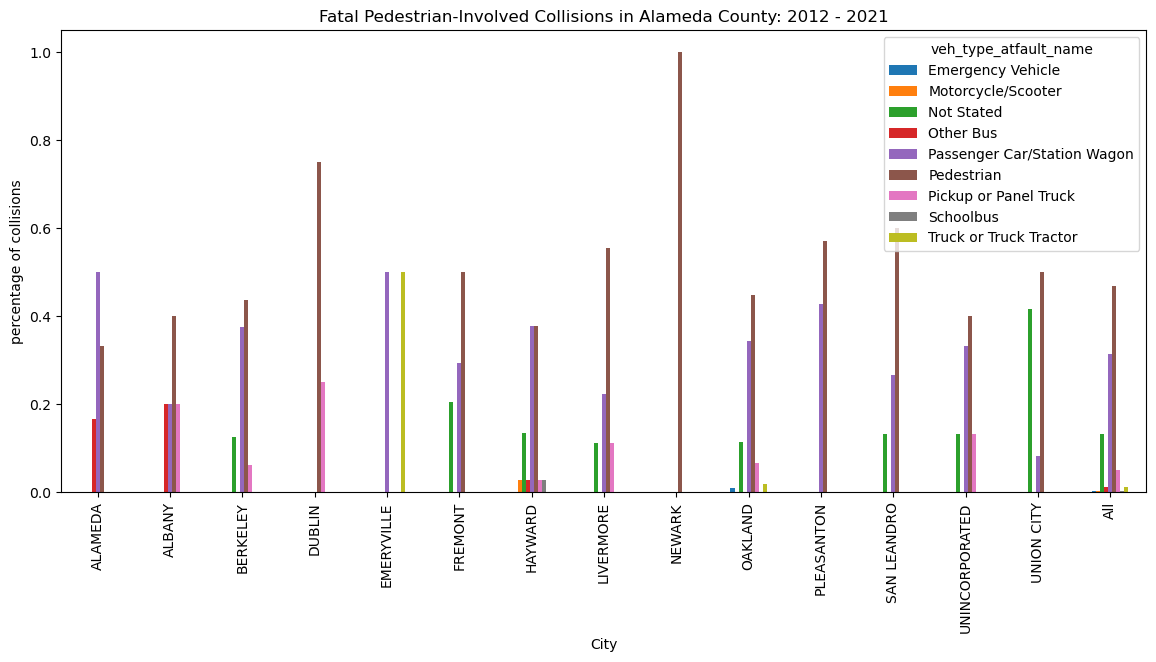

In [32]:
pd.crosstab(df_fatal['CITY'], df_fatal['veh_type_atfault_name'], margins=True, normalize='index').plot(
    kind='bar', figsize=(14,6), title='Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='percentage of collisions', xlabel='City')

<AxesSubplot:title={'center':'Severe Injury Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='percentage of collisions'>

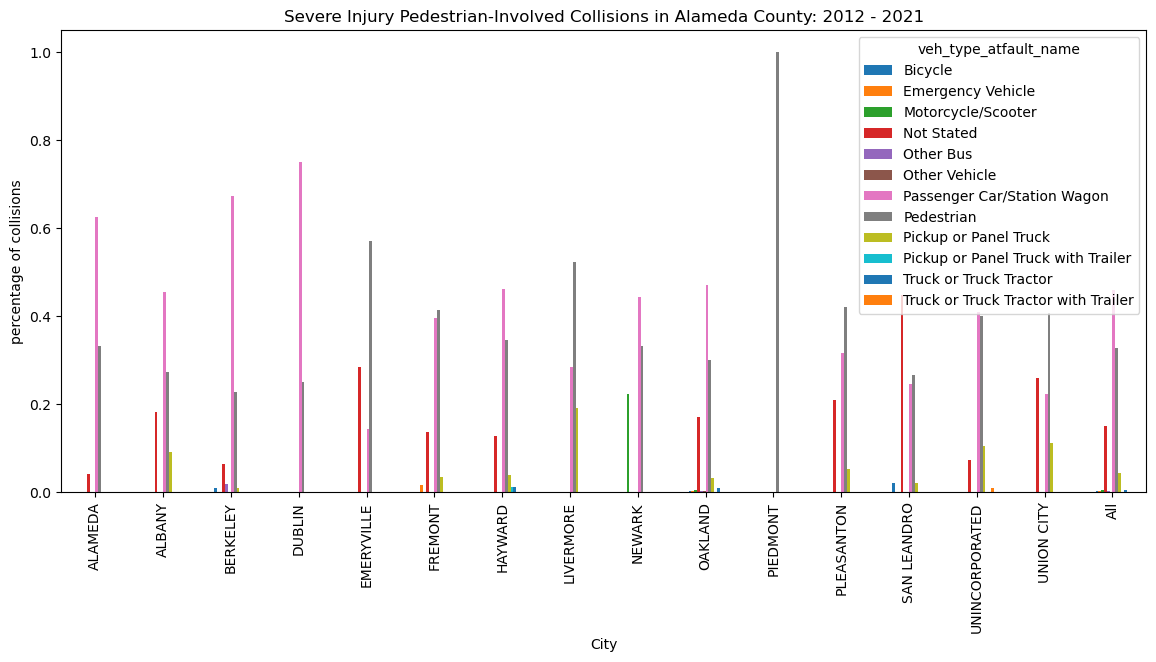

In [33]:
pd.crosstab(df_severe['CITY'], df_severe['veh_type_atfault_name'], margins=True, normalize='index').plot(
    kind='bar', figsize=(14,6), title='Severe Injury Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='percentage of collisions', xlabel='City')

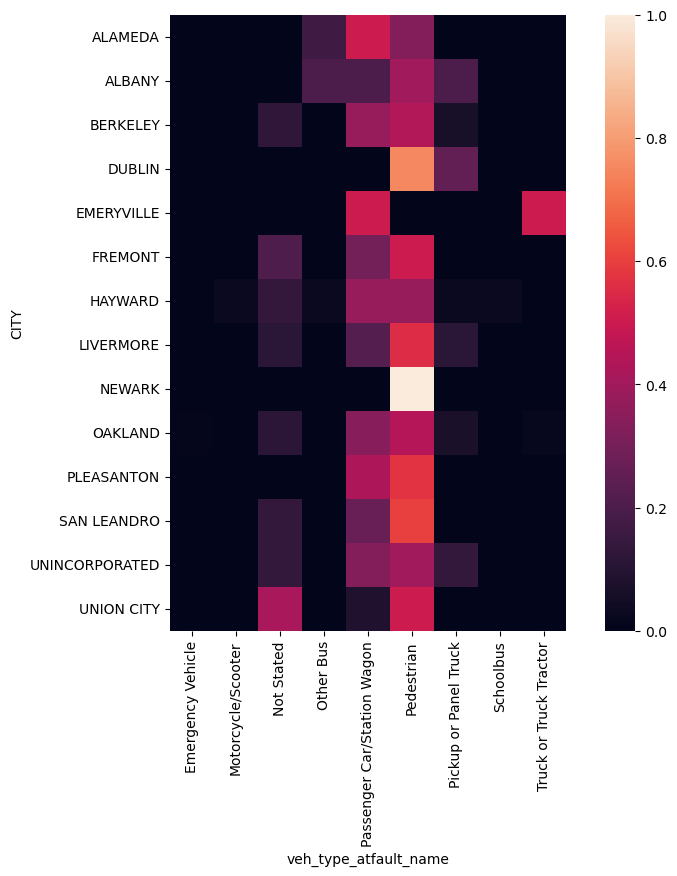

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_fatal['CITY'], df_fatal['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

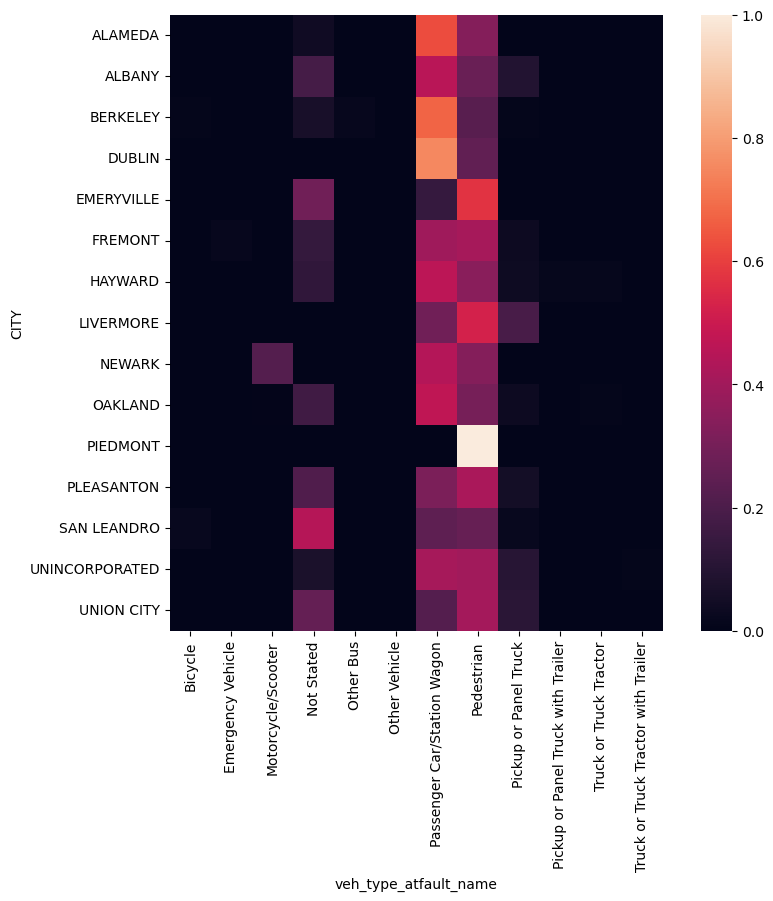

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
severe_heatmap = sns.heatmap(
    pd.crosstab(df_severe['CITY'], df_severe['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

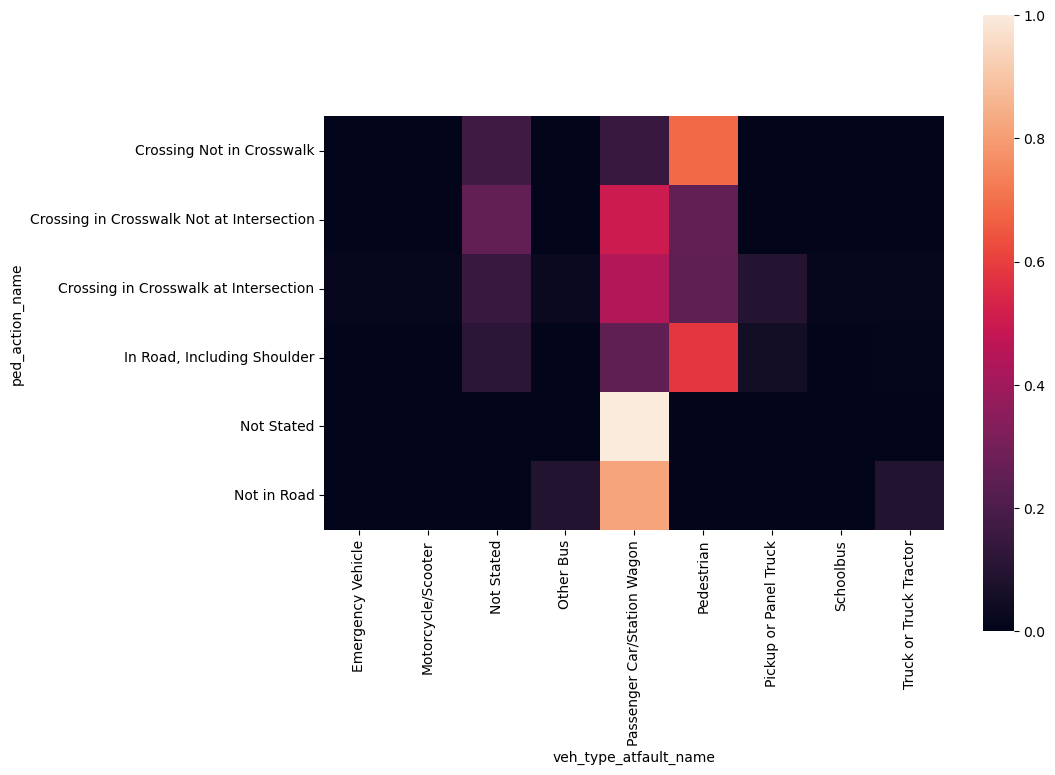

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_fatal['ped_action_name'], df_fatal['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

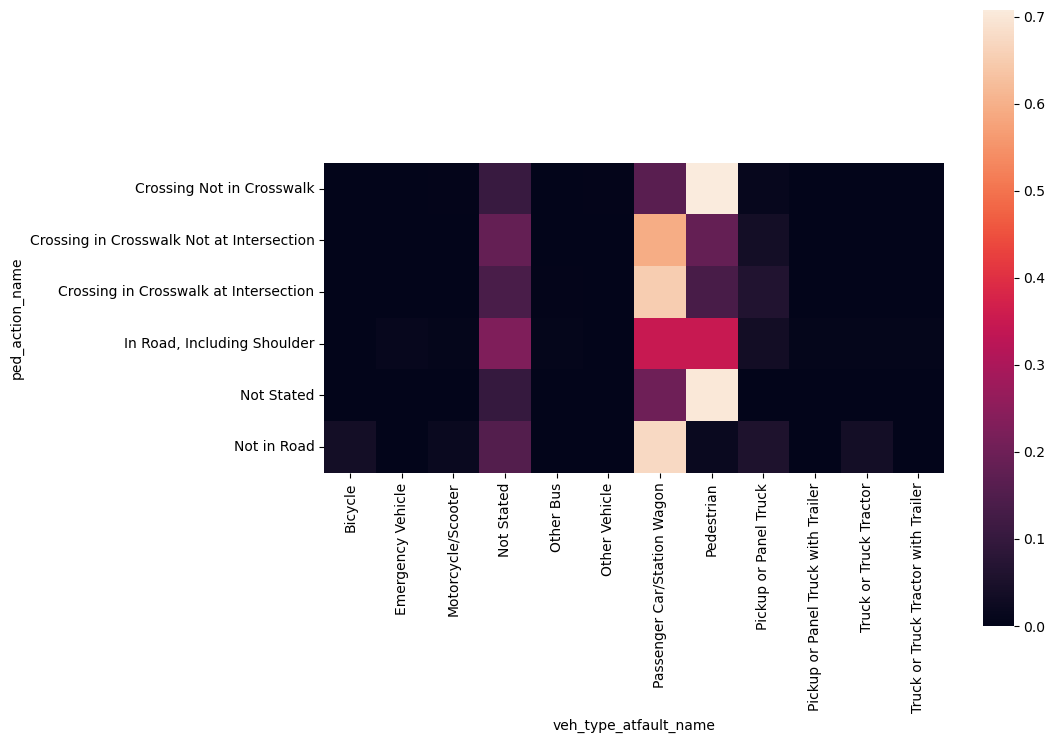

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_severe['ped_action_name'], df_severe['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

#### 6. Interpretation of the data analysis

For this initial analysis, I chose to focus only on traffic collisions in Alameda County (since that is the largest geographic scale queriable from SWITRS), from the entire time range of data available, 2012 to 2021. I wanted to understand the general landscape of how often pedestrians are found at-fault for the collisions in which they're involved, and also if those rates vary between collision severity. I focused only on fatal and severe collisions, since these incidents have the lowest rates of unreporting, and are highest priority for prevention to improve road safety for all users. 

Based on my initial analysis, we can see that for all of Alameda County, pedestrians are found at fault for 47% of all fatal crashes, and 33% of all severe crashes. Immediately this statistic raises an alarming flag - since vehicle speeds are the primary differentiator between a crash being severe or fatal, how is it possible that pedestrians are more often at fault for fatal crashes? This will be incorporated into the research question listed below. 

Additionally, this trend is fairly consistent across cities in Alameday County. Newark, Livermore, Dublin, San Leandro, and Union City have the highest at-fault rates for pedestrians for fatal collisions (although in each of these cities the total number of fatal collisions is much lower than in Oakland). By contrast, many cities found drivers of passenger vehicles more often at fault than pedestrians for severe injury crashes, with the major exceptions of Piedmont, Livermore, Emeryville, Pleasanton, and Union City. 

Lastly, in analyzing the pedestrian action by party at fault, generally pedestrians were found at-fault more often when they were crossing not in a crosswalk or in the road, including the shoulder across both collision severity levels. However, this split was much more stark for severe collisions, pointing to another research question - what is happening in the cases where a pedestrian is struck and killed while crossing in a crosswalk, but found at-fault for the collision?



#### 7. Research question and planned data analysis

For my final project, I plan to assess the existing landscape of at-fault rates for pedestrian-involved collisions in California and determine if there are is correlation between these rates and other urban characteristics/features. I have already done some of this analysis in Excel in my work done on a final paper for a traffic safety class, but I plan to leverage the power of Python to streamline and automate this analysis to assess many more factors. 

My plan for data analysis is as follows:

* Summarize at-fault rates by:
    * city (geographic visualizations)
    * demographic characteristics of victims (race, gender, age)
    * collision factors (pedestrian action, driver action, location in road)
* Perform linear regression analysis to assess potential correlation between at-fault rates and:
    * overal crash rates per capita in the city
    * population density
    * mode share
    * intersection density
    
I plan to perform this analysis primarily utilizing SWITRS California collision data for the 10-15 largest counties in California by population spanning 2012-2021. I also will look for outside data sources to assess correlation to mode share, population density, and intersection density. 